## Data Quality Report

### Data Summary

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

import warnings
warnings.filterwarnings('ignore')

/Users/lily/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_org = pd.read_csv('card transactions.csv')

In [3]:
data_org.head()  # I dunno why there are 'Unnamed: 10-17'

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_org.shape

(96753, 18)

In [5]:
# check whether those 'Unnamed 10-17' have any data
data_org.iloc[:,10:18].notnull().sum()
# every 'Unnamed' is null, so they are not fields in our data

Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
Unnamed: 17    0
dtype: int64

In [6]:
# so we just need the first 10 cols
data = data_org.iloc[:,0:10]
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [7]:
# def mem_usage(pandas_obj):
#     if isinstance(pandas_obj,pd.DataFrame):
#         usage_b = pandas_obj.memory_usage(deep=True).sum()
#     else: # we assume if not a df it's a series
#         usage_b = pandas_obj.memory_usage(deep=True)
#     usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
#     return "{:03.2f} MB".format(usage_mb)

In [8]:
# print(mem_usage(data))

In [9]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [10]:
# convert 'Date' into datetime data type
data['Date'] = pd.to_datetime(data['Date'])
data.describe(datetime_is_numeric=True)

,Recnum,Cardnum,Date,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,96753,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,2010-06-25 22:21:52.480232960,44706.596740,4.278857e+02,0.010945
min,1.000000,5.142110e+09,2010-01-01 00:00:00,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,2010-04-03 00:00:00,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,2010-06-27 00:00:00,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,2010-09-12 00:00:00,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,2010-12-31 00:00:00,99999.000000,3.102046e+06,1.000000
std,27930.329635,5.567084e+04,NaN,28369.537945,1.000614e+04,0.104047


In [11]:
# list all the numeric and categorical features
numerics = ['Date','Amount']
categoricals = ['Recnum','Cardnum','Merchnum','Merch description',
               'Merch state','Merch zip','Transtype','Fraud']

In [12]:
# create the overview of categorical features
# all the overview values we need for numerical features can be get directly from data.describe()

categorical_data = data.loc[:,categoricals]
populated2 = categorical_data.notna().mean() # Is there missing values? At what percentage?
blank = categorical_data.isnull() # How many missing values?
zeros = categorical_data[categoricals] =='0' # How many zeros?
unique = categorical_data.nunique(axis = 0) # Unique values
mode = categorical_data.mode().iloc[0,:] # Most common value
cate_summary = pd.DataFrame(data = {'% Populated':(populated2*100).round(2),
                                    '# Blank': blank.sum(),
                                    '# Zeros': zeros.sum(),
                                    '# Unique Values':unique.round(2),
                                    'Most Common Value':mode})

cate_summary


,% Populated,# Blank,# Zeros,# Unique Values,Most Common Value
Recnum,100.00,0,0,96753,1
Cardnum,100.00,0,0,1645,5142148452.0
Merchnum,96.51,3375,231,13091,930090121224
Merch description,100.00,0,0,13126,GSA-FSS-ADV
Merch state,98.76,1195,0,227,TN
Merch zip,95.19,4656,0,4567,38118.0
Transtype,100.00,0,0,4,P
Fraud,100.00,0,0,2,0.0


In [13]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [14]:
# Change the data type of categorical fields that are not object 

data['Recnum'] = data['Recnum'].astype(str)
data['Cardnum'] = data['Cardnum'].astype(str)
# we can not set 'Merch zip' as str here because it'll cause further issues
# data['Merch zip'] = data['Merch zip'].astype(str)
data['Fraud'] = data['Fraud'].astype(str)

In [15]:
data.describe(include='all', datetime_is_numeric=True)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753,96753,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753
unique,96753,1645,NaN,13091,13126,227,NaN,4,NaN,2
top,1,5142148452,NaN,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,0
freq,1,1192,NaN,9310,1688,12035,NaN,96398,NaN,95694
mean,NaN,NaN,2010-06-25 22:21:52.480232960,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,NaN
min,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,NaN
25%,NaN,NaN,2010-04-03 00:00:00,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,NaN
50%,NaN,NaN,2010-06-27 00:00:00,NaN,NaN,NaN,38118.000000,NaN,1.379800e+02,NaN
75%,NaN,NaN,2010-09-12 00:00:00,NaN,NaN,NaN,63103.000000,NaN,4.282000e+02,NaN
max,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,99999.000000,NaN,3.102046e+06,NaN


### Explore each feature

#### Fraud (label)

In [16]:
goods = data[data['Fraud'] == '0']
bads = data[data['Fraud'] == '1']
numrecords = len(data)
print('num of records:{}'.format(numrecords))
print('goods:{}'.format(len(goods)))
print('bads:{}'.format(len(bads)))

num of records:96753
goods:95694
bads:1059


In [17]:
print(len(goods) + len(bads))

96753


In [18]:
p_goods = (len(goods)/numrecords)*100
p_bads = (len(bads)/numrecords)*100
print('p_goods:{}'.format(round(p_goods,3)))
print('p_bads:{}'.format(round(p_bads,3)))

p_goods:98.905
p_bads:1.095


Text(0.5, 1.0, 'Count of Transaction Status (normal or fraudulent)')

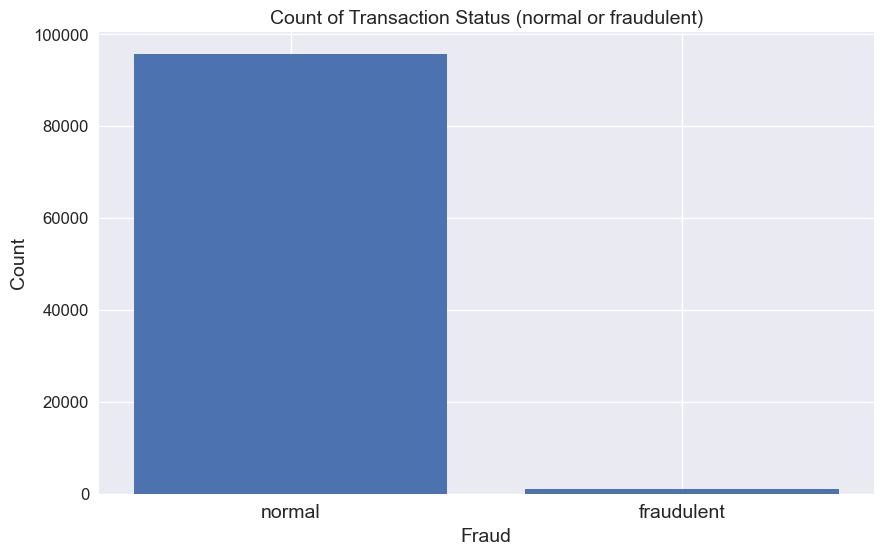

In [19]:
plt.style.use('seaborn')
plt.figure(figsize = (10,6))
ax = plt.bar(x = ['normal','fraudulent'], height = [len(goods),len(bads)])
plt.xlabel('Fraud',fontsize = '14')
plt.ylabel('Count',fontsize = '14')
plt.xticks(fontsize = '14')
plt.yticks(fontsize = '12')
plt.title('Count of Transaction Status (normal or fraudulent)', fontsize = '14')


#### Date

In [20]:
count_day = data.groupby('Date').count()
count_day.head(10)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


In [21]:
#1. Daily
plt.figure(figsize = (10,6))
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().trx

<Figure size 1000x600 with 0 Axes>

In [22]:
daily_count.tail(70)

Date
2010-10-23     31
2010-10-24     16
2010-10-25    197
2010-10-26    236
2010-10-27    280
             ... 
2010-12-27    199
2010-12-28    216
2010-12-29    263
2010-12-30    200
2010-12-31     53
Freq: D, Name: trx, Length: 70, dtype: int64

Text(0.5, 1.0, 'Daily Transactions')

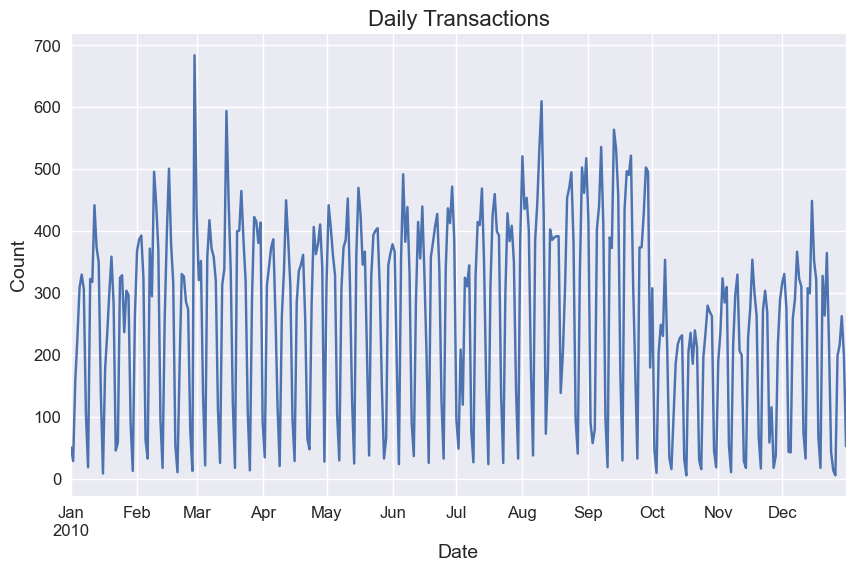

In [23]:
# daily transaction plot
plt.style.use('seaborn')
plt.figure(figsize = (10,6))
ax = daily_count.plot(fontsize = 12)
ax.set_xlabel('Date',fontsize = 14)
ax.set_ylabel('Count',fontsize = 14)
ax.set_title('Daily Transactions',fontsize = 16)

<AxesSubplot: title={'center': 'Daily Transactions'}, xlabel='Date'>

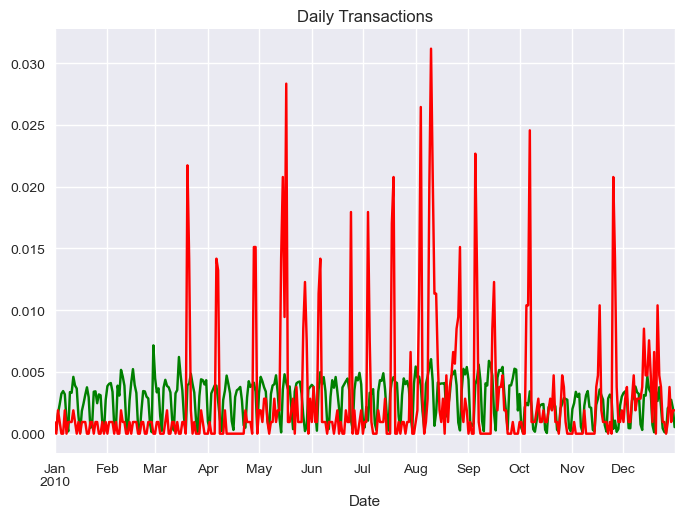

In [24]:
# daily benign over all benign transaction & daily fraudulant over all fraudulant transaction
# the proportions of fraudulant transactions are high because the total proportion of fraud is only about 1%
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [25]:
#2. Weekly
weekly_trans = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 7))\
    .count().trx

In [26]:
weekly_trans.shape

(53,)

In [27]:
weekly_trans

Date
2010-01-01    1414
2010-01-08    1930
2010-01-15    1504
2010-01-22    1597
2010-01-29    1838
2010-02-05    2075
2010-02-12    1965
2010-02-19    1467
2010-02-26    2017
2010-03-05    1962
2010-03-12    2181
2010-03-19    2098
2010-03-26    2031
2010-04-02    1835
2010-04-09    1865
2010-04-16    1679
2010-04-23    2232
2010-04-30    1985
2010-05-07    1994
2010-05-14    2200
2010-05-21    2023
2010-05-28    1740
2010-06-04    2112
2010-06-11    2061
2010-06-18    2064
2010-06-25    2176
2010-07-02    1436
2010-07-09    2147
2010-07-16    2151
2010-07-23    2044
2010-07-30    2412
2010-08-06    2516
2010-08-13    2279
2010-08-20    2406
2010-08-27    2368
2010-09-03    2026
2010-09-10    2509
2010-09-17    2462
2010-09-24    2389
2010-10-01    1402
2010-10-08     998
2010-10-15    1138
2010-10-22    1243
2010-10-29    1365
2010-11-05    1428
2010-11-12    1404
2010-11-19    1253
2010-11-26    1326
2010-12-03    1602
2010-12-10    1828
2010-12-17    1582
2010-12-24     941
2010-12

Text(0.5, 1.0, 'Weekly Transactions')

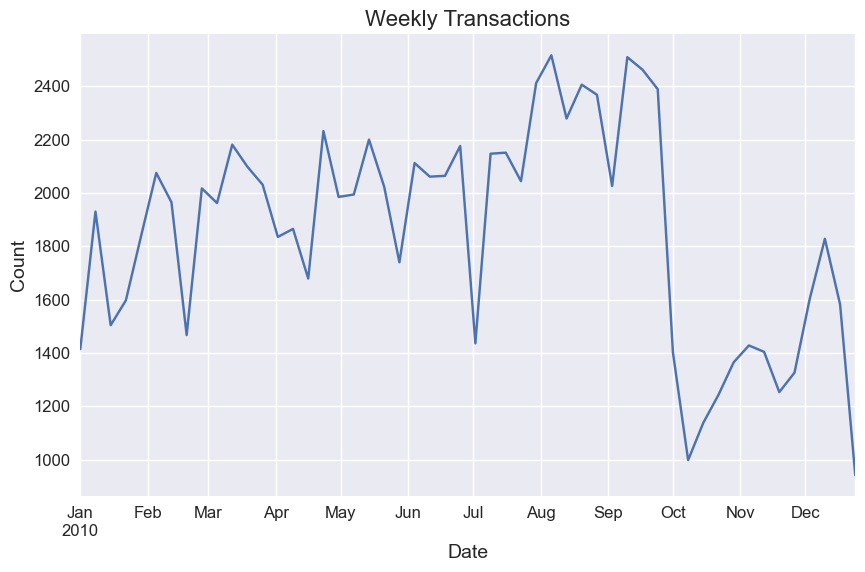

In [28]:
# For the week of 2010-12-31, there is only 1 day (2010-12-31 is the last day in the dataset)
# So I'll exclude it in the plot

# weekly plot
plt.figure(figsize = (10,6))
ax=weekly_trans[0:52].plot(fontsize = 12)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_title('Weekly Transactions', fontsize = 16) 

<AxesSubplot: title={'center': 'Weeky Transactions'}, xlabel='Date'>

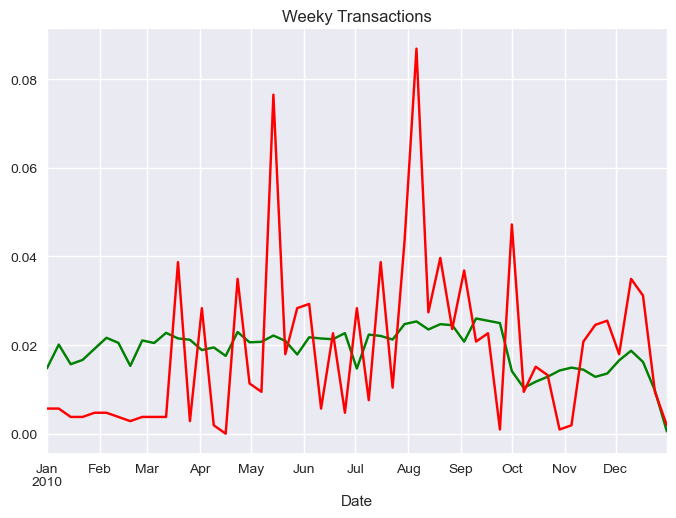

In [29]:
# weekly good/bad proportion
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [30]:
#3. Monthly
mon = data['Date'].dt.month
mon_gre = []
for i in range(1,13):
    mon_gre.append((mon==i).sum())
    
mon_gre

[6810, 7756, 9421, 7731, 8982, 9249, 8296, 11050, 9895, 5109, 5801, 6653]

Text(0.5, 1.0, 'Monthly Transactions')

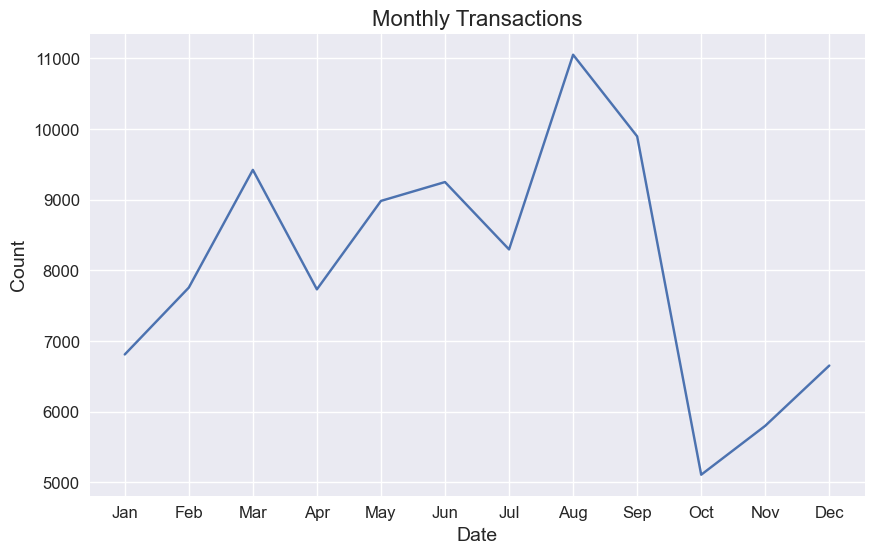

In [31]:
# monthly plot
plt.figure(figsize = (10,6))
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = plt.plot(mon_gre)
plt.xticks(np.arange(12),month, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title('Monthly Transactions',fontsize = 16)

#### Amount

In [32]:
(data['Amount'] <=8000).sum()/len(data)

0.9987803995741734

Text(0.5, 1.0, 'Distribution of Transaction Amounts')

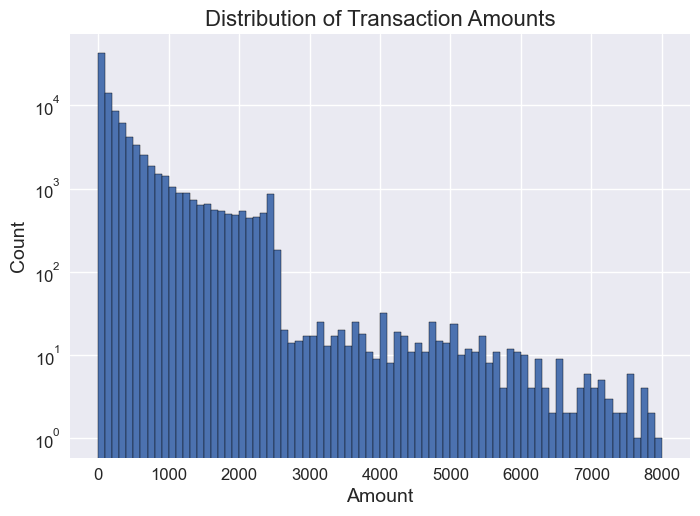

In [33]:
plt.hist(data['Amount'],bins=80,range=(0,8000), edgecolor = 'black')
plt.yscale('log')
plt.xticks(np.arange(0,8001,1000),fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Amount',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title('Distribution of Transaction Amounts', fontsize = 16)

#### Cardnum

In [34]:
len(data['Cardnum'].unique())

1645

In [35]:
data['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142306704       1
5142135021       1
5142276358       1
5142142008       1
5142233066       1
Name: Cardnum, Length: 1645, dtype: int64

Text(0.5, 1.0, 'Count of Card Numbers')

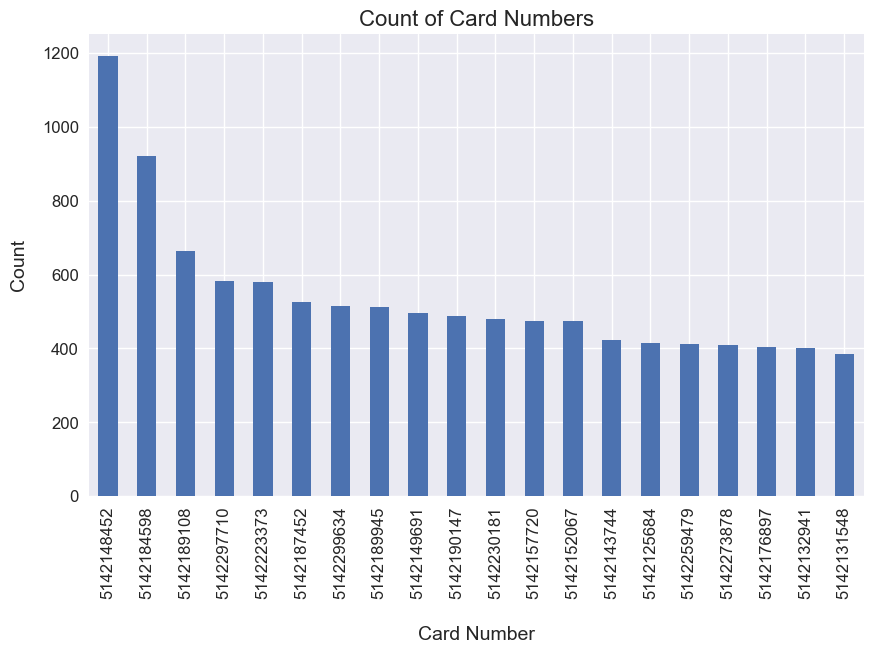

In [36]:
plt.figure(figsize=(10,6))
ax = data['Cardnum'].value_counts().head(20).plot(kind='bar',fontsize = 12)
#,logy=True)
ax.set_xlabel('Card Number',fontsize = 14,labelpad=20)
ax.set_ylabel('Count', fontsize = 14,labelpad = 10)
ax.set_title('Count of Card Numbers', fontsize = 16)

#### Merchnum

In [37]:
len(data['Merchnum'].unique())

13092

In [38]:
data['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64

Text(0.5, 1.0, 'Count of Merchant Number')

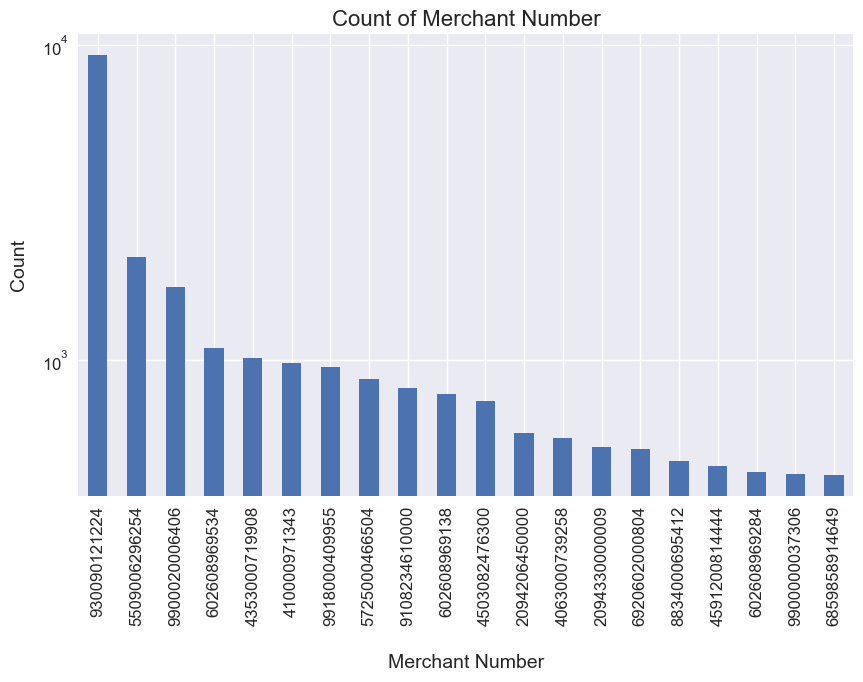

In [39]:
plt.figure(figsize = (10,6))
ax = data['Merchnum'].value_counts().head(20).plot(kind='bar',logy = True)
ax.set_xlabel('Merchant Number', fontsize = 14, labelpad =20)
ax.set_ylabel('Count', fontsize = 14, labelpad =10)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
plt.title('Count of Merchant Number', fontsize = 16)

#### Merch description

In [40]:
len(data['Merch description']) * 100 / numrecords

100.0

In [41]:
len(data['Merch description'].unique())

13126

In [42]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

Text(0.5, 1.0, 'Count of Merchant Description')

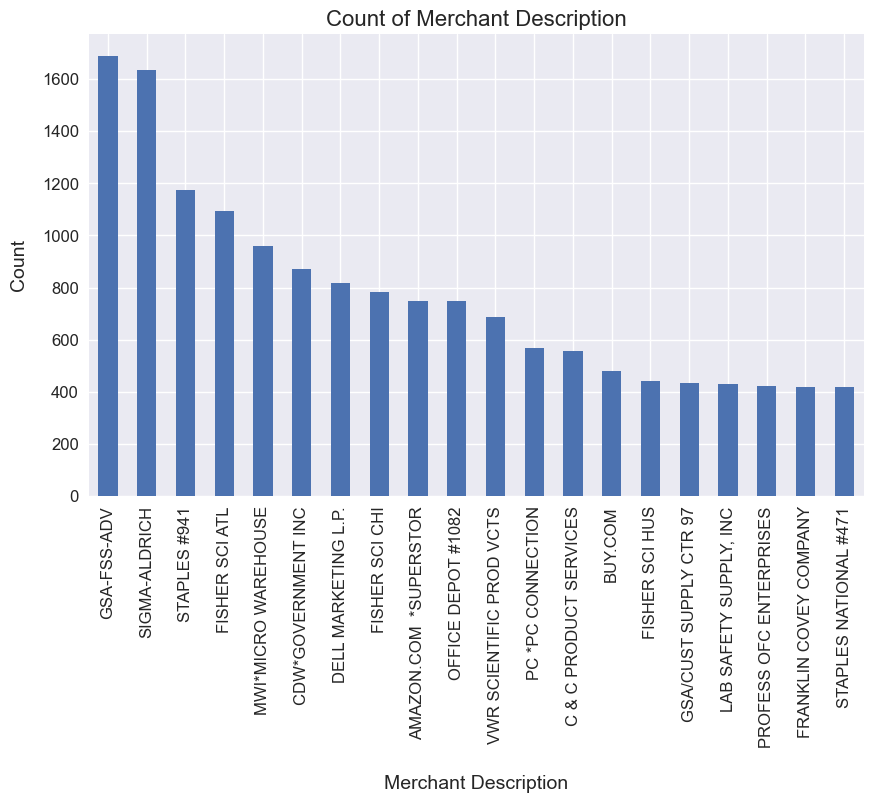

In [43]:
plt.figure(figsize = (10,6))
ax = data['Merch description'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel('Merchant Description', fontsize = 14, labelpad = 20)
ax.set_ylabel('Count', fontsize = 14, labelpad = 10)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
plt.title('Count of Merchant Description', fontsize = 16)

####  Merch state

In [44]:
len(data['Merch state']) * 100 / numrecords

100.0

In [45]:
len(data['Merch state'].unique())

228

In [46]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

Text(0.5, 1.0, 'Count of Merchant State')

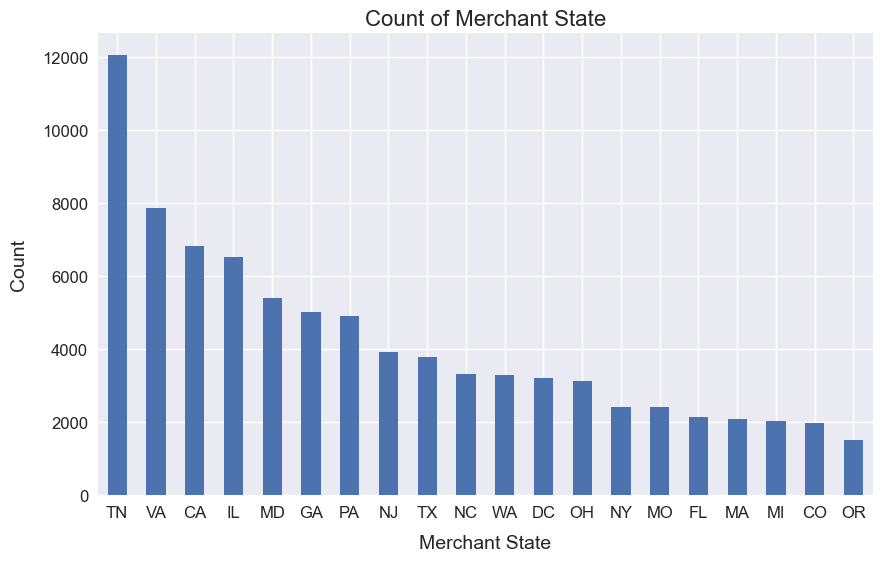

In [47]:
plt.figure(figsize = (10,6))
ax = data['Merch state'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel('Merchant State',fontsize = 14, labelpad = 10)
ax.set_ylabel('Count',fontsize = 14, labelpad = 10)
plt.xticks(rotation = 0,fontsize =12)
plt.yticks(fontsize = 12)
plt.title('Count of Merchant State', fontsize = 16)


#### Merch zip

In [48]:
len(data['Merch zip']) * 100 / numrecords

100.0

In [49]:
len(data['Merch zip'].unique())

4568

In [50]:
data_zip = data[data['Merch zip'].notnull()]
data_zip['Merch zip'] = data_zip['Merch zip'].astype(int)

In [51]:
data_zip.isna().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             1847
Merch description       0
Merch state            87
Merch zip               0
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [52]:
data['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
89125.0        1
46225.0        1
27025.0        1
6076.0         1
36043.0        1
Name: Merch zip, Length: 4567, dtype: int64

In [53]:
data_zip['Merch zip'].value_counts()

38118    11868
63103     1650
8701      1267
22202     1250
60061     1221
         ...  
89125        1
46225        1
27025        1
6076         1
36043        1
Name: Merch zip, Length: 4567, dtype: int64

Text(0.5, 1.0, 'Count of Merchant Zip Code')

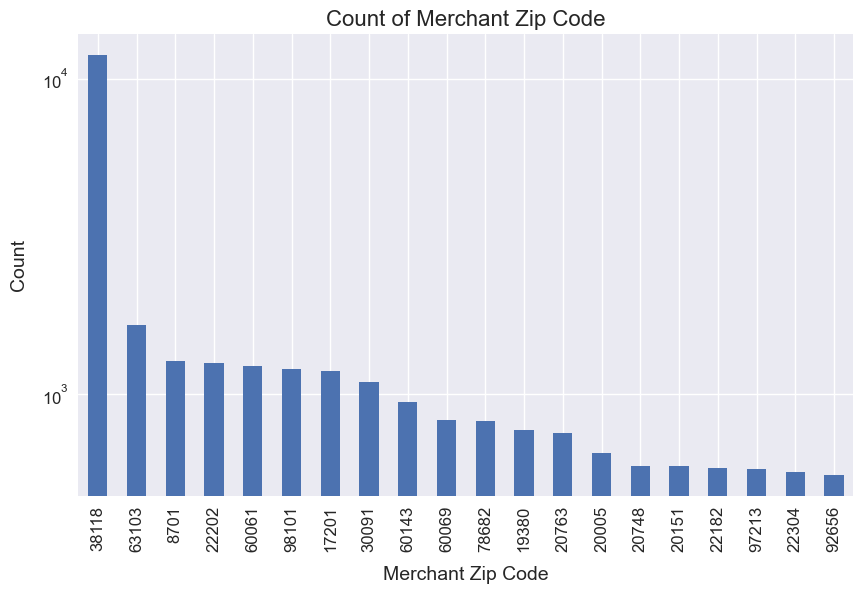

In [54]:
plt.figure(figsize = (10,6))
ax=data_zip['Merch zip'].value_counts().head(20).plot(kind='bar',logy = True)
ax.set_xlabel('Merchant Zip Code',fontsize=14,labelpad = 10)
ax.set_ylabel('Count',fontsize=14,labelpad = 10)
plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
plt.title('Count of Merchant Zip Code', fontsize = 16)

#### Transtype

In [55]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

Text(0.5, 1.0, 'Count of Transaction Type')

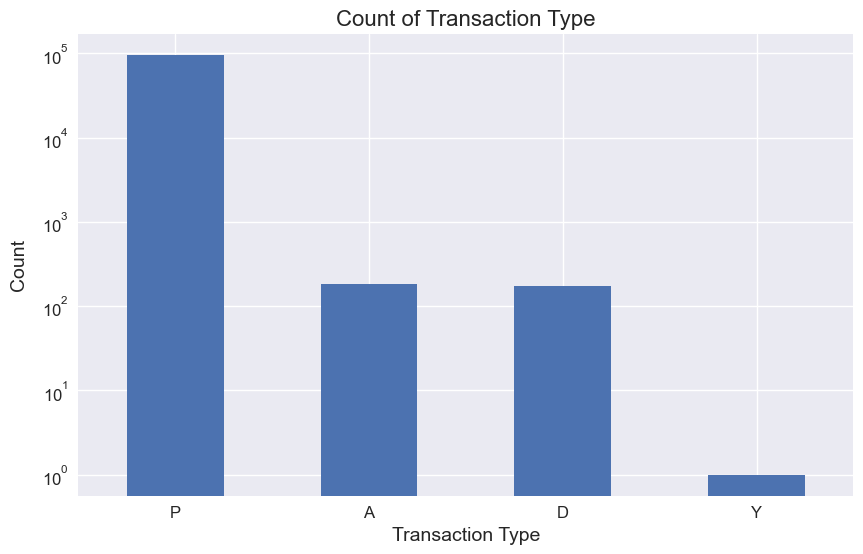

In [56]:
plt.figure(figsize = (10,6))
ax=data['Transtype'].value_counts().plot(kind='bar',logy = True)
ax.set_xlabel('Transaction Type',fontsize=14)
ax.set_ylabel('Count',fontsize=14,labelpad = 10)
plt.xticks(rotation = 0, fontsize =12)
plt.yticks(fontsize = 12)
plt.title('Count of Transaction Type', fontsize = 16)

In [57]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:06.394965
